## Torsional Response and Divergence for a Straight Wing

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Parameters
v = 1       #Free-Stream Speed
L = 10
N = 3     #Number of FEM elements
alpha_r = 0
le = L/N
g = 9.81
N_fac = 1


def GJ_func(y):
  return 1 + 0*y

def e_func(y):
  return 0.5 + 0*y

def c_func(y):
  return 1 + 0*y

def CL_alpha_func(y):
  return 1 + 0*y

def Cm_AC_func(y):
  return -0.1 + 0*y

def m_func(y):
  return 1 + 0*y

def d_func(y):
  return 0.2 + 0*y

In [ ]:
def stiffness_matrix(v, elem_num):

  #q = 0.5*1.225*(v**2)
  #le = L/N

  discrete_pts = 10
  x_s = np.linspace(elem_num*le, (elem_num+1)*le, discrete_pts)

  GJ = np.mean(GJ_func(x_s))
  #e = np.mean(e_func(x_s))
  #c = np.mean(c_func(x_s))
  #CL_alpha = np.mean(CL_alpha_func(x_s))
  #Cm_AC =  np.mean(Cm_AC_func(x_s))
  #m = np.mean(m_func(x_s))
  #d = np.mean(d_func(x_s))
  #const = q*c*e*CL_alpha*alpha_r + q*(c**2)*Cm_AC - N*m*g*d

  K_stiffness = (GJ/le)*np.array([[-1, 1], [1, -1]])

  return K_stiffness

In [ ]:
def moment_matrix(v, elem_num):

  q = 0.5*1.225*(v**2)
  le = L/N

  discrete_pts = 10
  x_s = np.linspace(elem_num*le, (elem_num+1)*le, discrete_pts)

  #GJ = np.mean(GJ_func(x_s))
  e = np.mean(e_func(x_s))
  c = np.mean(c_func(x_s))
  CL_alpha = np.mean(CL_alpha_func(x_s))
  #Cm_AC =  np.mean(Cm_AC_func(x_s))
  #m = np.mean(m_func(x_s))
  #d = np.mean(d_func(x_s))
  #const = q*c*e*CL_alpha*alpha_r + q*(c**2)*Cm_AC - N*m*g*d

  K_moment = q*e*c*CL_alpha*(le/3)*np.array([[1, 0.25], [0.25, 1]])

  return K_moment

In [ ]:
def force_vector(v, elem_num):

  q = 0.5*1.225*(v**2)
  le = L/N

  discrete_pts = 10
  x_s = np.linspace(elem_num*le, (elem_num+1)*le, discrete_pts)

  #GJ = np.mean(GJ_func(x_s))
  e = np.mean(e_func(x_s))
  c = np.mean(c_func(x_s))
  CL_alpha = np.mean(CL_alpha_func(x_s))
  Cm_AC =  np.mean(Cm_AC_func(x_s))
  m = np.mean(m_func(x_s))
  d = np.mean(d_func(x_s))
  const = q*c*e*CL_alpha*alpha_r + q*(c**2)*Cm_AC - N_fac*m*g*d

  force_vector = -const*le/2 * np.array([1, 1])

  return force_vector

In [ ]:
def global_matrices(v):

    q = 0.5*1.225*(v**2)
    le = L/N

    Global_stiffness = np.zeros((N+1, N+1))

    for i in range(N):
      K_stiff = stiffness_matrix(v, i)
      K_mom = moment_matrix(v, i)

      K = K_stiff + K_mom

      Global_stiffness[i:i+2,i:i+2] += K

    Global_force = np.zeros((N+1,1))

    for i in range(N):

      Global_force[i:i+2,0] += force_vector(v, i)

    return Global_stiffness, Global_force

In [ ]:
def Model(v):

  Global_A, Global_b = global_matrices(v)

  #Imposing boundary conditions (theta at = 0)
  A_solve = Global_A[1:, 1:]
  b_solve = Global_b[1:, 0]

  theta_solve = np.linalg.solve(A_solve, b_solve)
  theta = np.zeros(N+1)
  theta[1:] = theta_solve

  x_s = np.arange(N+1)*le
  plt.plot(x_s, theta)

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

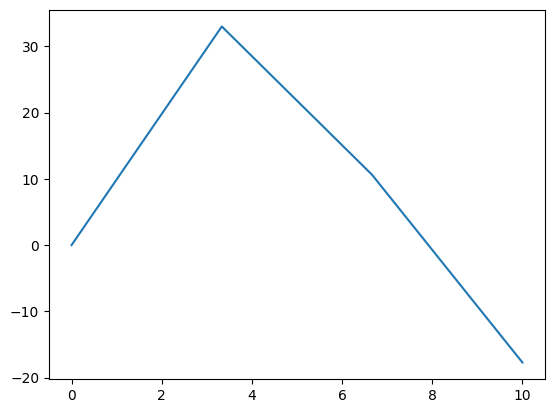

In [ ]:
interact(Model, v=(0,10), N=fixed(N),L=fixed(L))

In [ ]:
#For diveregence speed
#Solve for det = 0

def det_global(V):
    Global_A, Global_b = global_matrices(V)

    # Calculate the determinant of A
    det_A = np.linalg.det(Global_A)

    return det_A

#Implementing the bisection method

def divergence_speed_bisection(det, a, b, tol=1e-6, max_iter=1000):

    # Check if the signs of the function at the endpoints are opposite
    if det(a) * det(b) > 0:
        print("Error: The function has the same sign at both endpoints.")
        return None

    # Define the midpoint of the interval
    c = (a + b) / 2

    # Check if the interval is small enough or maximum iterations reached
    if abs(b - a) < tol or max_iter == 0:
        return c

    # Recursive case: update the interval and call the function recursively
    if det(c) * det(a) < 0:
        return divergence_speed_bisection(det, a, c, tol, max_iter - 1)
    else:
        return divergence_speed_bisection(det, c, b, tol, max_iter - 1)

In [ ]:
divergence_speed_bisection(det_global, 0, 1, tol=1e-6, max_iter=1000)

0.6259684562683105